In [1]:
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
%matplotlib inline
import seaborn as sns               
from bs4 import BeautifulSoup  

In [3]:
data = pd.read_table('C:/Users/reception/Desktop/reviews.tsv')

In [4]:
data.isnull().sum()

permalink        0
rating         159
review_text    160
dtype: int64

In [5]:
data = data.dropna()

In [7]:
data['rating'].astype('int')
data["rating"] = data['rating'].astype('int')
data.dtypes

permalink      object
rating          int32
review_text    object
dtype: object

In [8]:
data

,permalink,rating,review_text
0,1000095379,4,"Вкусная питца, естт летнее кафе, доставка, при..."
1,1000095379,1,Думал можно днём с детьми посидеть на открытой...
2,1000095379,4,"Есть веранда, вкусная пицца, делают по половин..."
3,1000095379,1,Уже второй раз забивают на заказ
4,1000095379,5,Любимая пиццерия! 👍
...,...,...,...
328640,245591834558,5,Очень вкусная пицца!!!!
328641,245591834558,5,"Лучший борщ на Роза Хутор!!! Большая порция, т..."
328642,245591834558,5,Все понравилось! Пицца норм
328643,245591834558,1,"обслуживание нормальное, соотношение цена/каче..."


In [10]:
a=[]
for i in data['rating']:
    if i <3:                              
        a.append(0)
    if i==3:
        a.append(1)
    if i>3:
        a.append(2)

C:\Users\reception\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


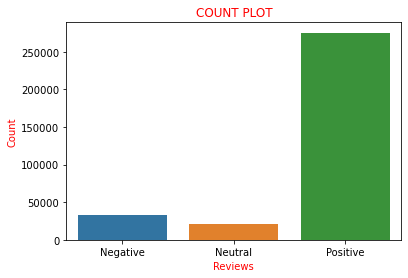

In [15]:
sns.countplot(a)
plt.xlabel('Reviews', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [17]:
data['sentiment']=a
final_dataset = data[['review_text','sentiment']]
final_dataset

,review_text,sentiment
0,"Вкусная питца, естт летнее кафе, доставка, при...",2
1,Думал можно днём с детьми посидеть на открытой...,0
2,"Есть веранда, вкусная пицца, делают по половин...",2
3,Уже второй раз забивают на заказ,0
4,Любимая пиццерия! 👍,2
...,...,...
328640,Очень вкусная пицца!!!!,2
328641,"Лучший борщ на Роза Хутор!!! Большая порция, т...",2
328642,Все понравилось! Пицца норм,2
328643,"обслуживание нормальное, соотношение цена/каче...",0


In [41]:
final_dataset['count'].value_counts()

2    275180
0     32936
1     20369
Name: count, dtype: int64

In [50]:
datap = final_dataset['count'].iloc[np.random.randint(1, 275180,5000), :]
datan = final_dataset['count'].iloc[np.random.randint(1, 32936,5000), :]
len(datan), len(datap)

IndexingError: Too many indexers

In [44]:
data = pd.concat([datap,datan])
len(data)

10000

In [48]:
data

,sentiment,count
96187,Вкусный кофе,2
148417,"Отличный ресторан грузинской кухни, все вкусно...",2
270267,"Замечательное место, отличная кухня, атмосферно!",2
144686,"Очень уютная столовая, всё было вкусно, чисто ...",2
177272,"Приятно, вкусно, недорого",2
...,...,...
848,"Из минусов: нет брони, скидки на ДР только ден...",2
31426,Очень красивое убранство уютные залы вкусная и...,2
24815,Внутри никогда не был. Раз в месяц заказываю у...,2
31140,Все ок,2


In [49]:
c=[]
for i in data['sentiment']:
    if i==0:
        c.append(0)
    if i==2:
        c.append(1)
data['sentiment']=c
sns.countplot(data['sentiment'])
plt.show()

ValueError: Length of values (0) does not match length of index (10000)